<a href="https://colab.research.google.com/github/qma16443/RobotAutomation/blob/main/System_Design_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fully Robotic Automated Restaurant Design

Imagine you’re tasked with creating a fully automated restaurant that accepts online orders. Customers can submit an order through the restaurant’s website or mobile app. After receiving an order, the automated restaurant will prepare the food. The restaurant uses a series of specialized robots to prepare a variety of food including burgers, salads, sandwiches, side dishes, and desserts.

● Each order will have a series of food items that must be prepared.

● Each food item requires a series of steps that must be completed in a certain order,and most steps must be completed within a given duration of time.

● Each specialized robot only handles a specific task. For example, one robot may cook burger patties, another prepares vegetables, a third robot assembles and packages the completed burger.

● Control software must coordinate and dispatch commands to the robots.

● The restaurant currently only has one robot for each task.

Keep in mind that multiple orders may arrive in a similar timeframe and that some tasks may be blocked while others are not, due to robot availability.



## Design Questions:


## 1.  high-level software components (microservices and interfaces)

I defined 8 different microservices and interfaces which as following shows:

### 1. Order Management Service (OMS)

Handles all aspects of order processing from placement to cancellation. It directly interacts with the Inventory Management Service to check stock levels, Robot Orchestrator Service for task coordination, and Payment Service for payment processing.


#### `placeOrder(orderDetails: OrderDetails): OrderConfirmation`
- Place a new order. Validates with IMS to ensure ingredients are available.
- Input: `OrderDetails` containing product ID, quantity, customer information, status,etc.
- Output: `OrderConfirmation` containing OrderDetails, confirmation number, estimated delivery time, etc.

#### `updateOrder(orderId: string, updatedDetails: OrderDetails): OrderConfirmation`
- Update existing order. Communicates with ROS to rearrange preparation sequence if needed, using a robust algorithm for rescheduling
- Input: Order ID and `updatedDetails` containing the new order information.
- Output: `OrderConfirmation` containing OrderDetails, confirmation number, estimated delivery time, etc.

#### `pauseOrder(orderId: string): OrderDetails`
- Pause an ongoing order preparation. Sends instructions to ROS to temporarily halt robot tasks.
- Input: Order ID for the ongoing order preparation.
- Output: `OrderDetails` of the pause operation.

#### `resumeOrder(orderId: string): OrderDetails`
- Resume a paused order. Notifies ROS to continue with the robot tasks.
- Input: Order ID for the paused order.
- Output: `OrderDetails` of the resume operation.

#### `retrieveOrderStatus(orderId: string): OrderDetails`
- Retrieve the status of an order.
- Input: Order ID.
- Output: `OrderDetails` containing the current status of the order.

#### `cancelOrder(orderId: string): OrderDetails`
- Cancel an order. Notifies ROS to stop preparation and frees up the assigned robots.
- Input: Order ID for the ongoing order.
- Output: `OrderDetails` of the cancellation operation.

#### `getEstimatedPreparationTime(orderId: string): TimeDetails`
- Provide the customer with real-time updates on the preparation progress and remaining time.
- Input: Order ID.
- Output: TimeDetails containing the estimated preparation time.

#### `setOrderPriority(orderId: string,priorityLevel: PriorityLevel): OrderDetails`
- Cancel an order. Notifies ROS to stop preparation and frees up the assigned robots.
- Input: Order ID, Priority Level (e.g., express, standard).
- Output: `OrderDetails` of updated order.

#### `retrieveAllOrders(filters: FilterOptions): OrdersList`
- Retrieve a list of all orders, with an option to include robot-task status from ROS  (optional for administrative purposes).
- Input: Optional `filters` for specific order retrieval.
- Output: `OrdersList` containing a list of all orders with their details.

#### `coordinateRoboticTasks(orderId: string, changes: ChangesDetails): RoboticTasksStatus`
- Coordinate robotic tasks with ROS to align with order changes. for example priority changes
- Input: Order ID, `changes` containing details of changes needed for order.
- Output: `RoboticTasksStatus` of the coordination operation.

-- similar operator functions for Items--

### 2. Inventory Management Service (IMS)

Responsible for tracking and managing the stock levels of ingredients. It provides critical data to the OMS for order processing and interacts with the Monitoring & Alert Service and Notification Service to alert low stock levels.

#### `checkStock(ingredientId: string): StockDetails`
- Check one ingredient stock.
- Input: Ingredient ID.
- Output: `StockDetails` containing the ingredient's current quantity, experied data and in stock data, etc.

#### `updateStock(ingredientId: string, newStockUpdates: NewStockUpdates): StockDetails`
- Update one ingredient stock.
- Input: Ingredient ID and the new updates .
- Output: `StockDetails` of the update operation.

#### `sendAlertLowStock(ingredientId: string): AlertStatus`
- Alert low stock. interact with MAS
- Input: Ingredient ID of the low-stock item.
- Output: `AlertStatus` containing the status of the alert.

#### `retrieveInventoryList(): InventoryList`
- Retrieves a complete inventory list
- Input: None.
- Output: `InventoryList` containing details of all ingredients and their stock levels.

### 3. Robot Orchestrator Service (ROS)

Serves as the command center for robot management, task scheduling, real-time coordination, and insights on performance. It takes instructions from OMS to coordinate tasks for specific orders and send data to Monitoring & Alert Service
for performance improvement.

#### `registerOrUpdateRobot(robotUpdates: RobotUpdates): RobotDetails`
- Register or update a robot
- Input: `RobotUpdates` containing all the robot's specifications and current status.
- Output:'RobotDetails` containing all the specifications and current status.

#### `retrieveRobotDetails(robotId: string): RobotDetails`
- Retrieve robot details
- Input: Robot ID.
- Output: `RobotDetails` containing all the specifications and current status.

#### `retrieveSpecificRobotDetails(robotCapability: RobotCapability): `RobotDetails`
- Retrieve all robot details of clike cooking, package,etc.
- Input: RobotCapability.
- Output: `RobotDetails` containing List of all the specifications and current status of RobotCapability .

#### `deactivateRobot(robotId: string): RobotDetails`
- Deactivate a robot
- Input: Robot ID for deactivation.
- Output: `RobotDetails` of the deactivation operation.

#### `checkHealth (robotId: string): RobotkHealth`
- Check one Robot health to see if it needs maintenance.
- Input: robotId.
- Output: `RobotkHealth` containing the Robot's current load and efficiency.

#### `scheduleTask(taskDetails: TaskDetails): TaskStatus`
- schedule or update an individual robot task
- Input: `TaskDetails` containing all the specifications of the task.
- Output: `TaskStatus` containing the status of the scheduling operation.

#### `retrieveTaskDetails(taskId: string): TaskDetails`
- Retrieve task details
- Input: Task ID.
- Output: `TaskDetails` containing all the specifications and current status.

#### `cancelTask(taskId: string): TaskDetails`
- Cancel a task
- Input: Task ID for cancellation.
- Output: `TaskDetails` of the cancellation operation.

#### `scheduleEntirePreparation(preparationDetails: PreparationDetails): ScheduleDetails`
- Schedule the entire preparation process, considering the dependencies between task, timing, and required synchronization between different robots.
- Input: `PreparationDetails` containing all the necessary information and constraints to schedule the entire preparation process .
- Output: `ScheduleDetails` ccontaining the new proposal after constraint programming using tools like Google OR-tools.

#### `rescheduleTasks(taskDetails: TaskDetails, newSchedule: Schedule): ScheduleDetails`
- Reschedule tasks.
- Input: `TaskDetails` and new schedule information.
- Output: `ScheduleDetails` of the rescheduling operation.

### 4. External Payment Gateway:

This component can interface with popular payment gateways (such as Amazon Payments, We Pay, PayPal, ApplePay) or personal credit card providers (such as Amex, Visa, Mastercard, etc.). The order service will interact with this component to ensure payment is complete when the order is confirmed. Interactions should be synchronous in nature.

#### `processPayment(paymentDetails: PaymentDetails): PaymentStatus`
- Process payment
- Input: `PaymentDetails` containing card information, order amount, etc.
- Output: `PaymentStatus` containing transaction ID, status, etc.

#### `handleRefunds(refundDetails: RefundDetails): RefundStatus`
- Handle refunds.
- Input: `RefundDetails` containing original payment information, reason for refund, etc.
- Output: `RefundStatus` containing refund status, amount, etc.

#### `retrievePaymentStatus(paymentId: string): PaymentStatus`
- Retrieve payment status.
- Input: Payment ID.
- Output: `PaymentStatus` containing the current status of the payment.

### 5. Monitoring & Alert Service (MAS)

Provides performance insights, alert management, and predictive analytics to ensure system stability and efficiency may with the help of third party tools.It can receive alerts from the IMS for low-stock situations and provide analytics to administrative users; it can receive opration data from Robot Orchestrator Service for better scheduling performance and monitor robot ussages;it can get data from Order Management Service to do data analysis and ML prediction.

#### `retrieveRobotsOperationMetrics(): RobotsOperationMetrics`
- Can gather data from ROS to monitor robot usages and performance, aiding in real-time analysis and optimization.
- Input: None.
- Output: `Metrics` containing robots operation performance metrics.


#### `getAnalytics(filter:Filter): Analytics`
- Utilizes data from OMS, ROS for advanced data analysis and Machine Learning predictions and alerting dashboard, including integration with third-party analytics products.
- Input: `Filter` to tailor the analytics view
- Output: `Filter` Comprehensive analytics and predictive insights, including integration with third-party analytics tools.

### 6. Authentication & Authorization

Responsible for user authentication and authorization of actions. It supports all services by ensuring that only authorized users can perform specific actions.

#### `authenticateUsers(userCredentials: UserCredentials): AuthToken`
- Authenticate users
- Input: `UserCredentials` containing username and password.
- Output: `AuthToken` containing the token for authenticated sessions.

#### `authorizeActions(userId: string, actionDetails: ActionDetails): AuthorizationStatus`
- Authorize actions
- Input: User ID and `actionDetails` containing the action to be authorized.
- Output: `AuthorizationStatus` containing the result of the authorization check.

#### `manageRoles(roleDetails: RoleDetails): RoleStatus`
- Manages user roles
- Input: `RoleDetails` containing the role to be managed (add, update, delete).
- Output: `RoleStatus` containing the status of the role management.

#### `retrieveUserDetails(userId: string): UserDetails`
- Retrieves user details
- Input: User ID.
- Output: `UserDetails` containing all information related to the user.

#### `deactivateUser(userId: string): RoleStatus`
- Deactivates a user
- Input: User ID for deactivation.
- Output: `RoleStatus` of the deactivation operation.

### 7. Customer Service

Handles customer profiles, feedback, loyalty programs, and other customer-related functions. It may interact with OMS for order-related customer service and Notification Service for sending updates to customers.

#### `manageProfile(customerId: string, profileDetails: ProfileDetails): ProfileStatus`
- Manage profiles
- Input: Customer ID and `profileDetails` containing the profile information to be managed.
- Output: `ProfileStatus` containing the status of the profile management.

#### `collectFeedback(feedbackFilter: FeedbackFilter,startTime Time, endTime Time): FeedbackDetails`
- Collects and Retrieves customer feedback for analysis.
- Input: `feedbackFilter` containing customer feedback category.`startTime`\`endTime Time` collection time interval.
- Output: `FeedbackDetails` containing customer feedbacks.

#### `manageLoyaltyPrograms(customerId: string, loyaltyDetails: LoyaltyDetails): LoyaltyStatus`
- Manages customer loyalty programs.
- Input: Customer ID and `loyaltyDetails` containing loyalty program information.
- Output: `LoyaltyStatus` containing the status of the loyalty program management.

#### `deleteCustomerProfile(customerId: string): DeletionStatus`
- Deletes a customer profile.
- Input: Customer ID.
- Output: `DeletionStatus`.

#### `manageNotificationSettings(customerId: string, updateSetting: UpdateSetting): NotificationStatus`
- Manages customer loyalty programs.
- Input: Customer ID and `updateSetting` containing notification settings updates like different types of notifications (e.g., SMS, email, push notifications).
- Output: `NotificationStatus` containing the status of the Customer Notification setting. Accept latest ads, promos reccomendations or not.

### 8. Notification Service (NS)

Manages sending notifications, including bulk notifications, updates, and cancellations. It can be utilized by Customer Service to send customer notifications and updates and by OMS to notify customers of order statuses and by Monitoring & Alert Service to alert robot died or ingredient out of stock .

#### `sendNotifications(notificationDetails: NotificationDetails): NotificationStatus`
- Send notifications.
- Input: `NotificationDetails` containing message, recipients, etc.
- Output: `NotificationStatus` containing the status of the notification.

#### `sendBulkNotifications(bulkNotificationDetails: BulkNotificationDetails): BulkNotificationStatus`
- Send bulk notifications
- Input: `BulkNotificationDetails` containing messages, recipients, etc.
- Output: `BulkNotificationStatus` containing the status of the bulk notifications.

#### `updateScheduledNotification(notificationId: string, updatedDetails: NotificationDetails): UpdateStatus`
- Update scheduled notification.
- Input: Notification ID and `updatedDetails` containing the new notification information.
- Output: `UpdateStatus` containing the status of the update.

#### `retrieveNotificationStatus(notificationId: string): NotificationStatus`
- etrieve the status of a specific notification.
- Input: Notification ID.
- Output: `NotificationStatus` containing the current status of the notification.

#### `cancelScheduledNotification(notificationId: string): CancellationStatus`
- Cancel a scheduled notification
- Input: Notification ID.
- Output: `CancellationStatus` of the scheduled notification.




## 2.  block diagram of this system showing the high-level software components and how they interact.

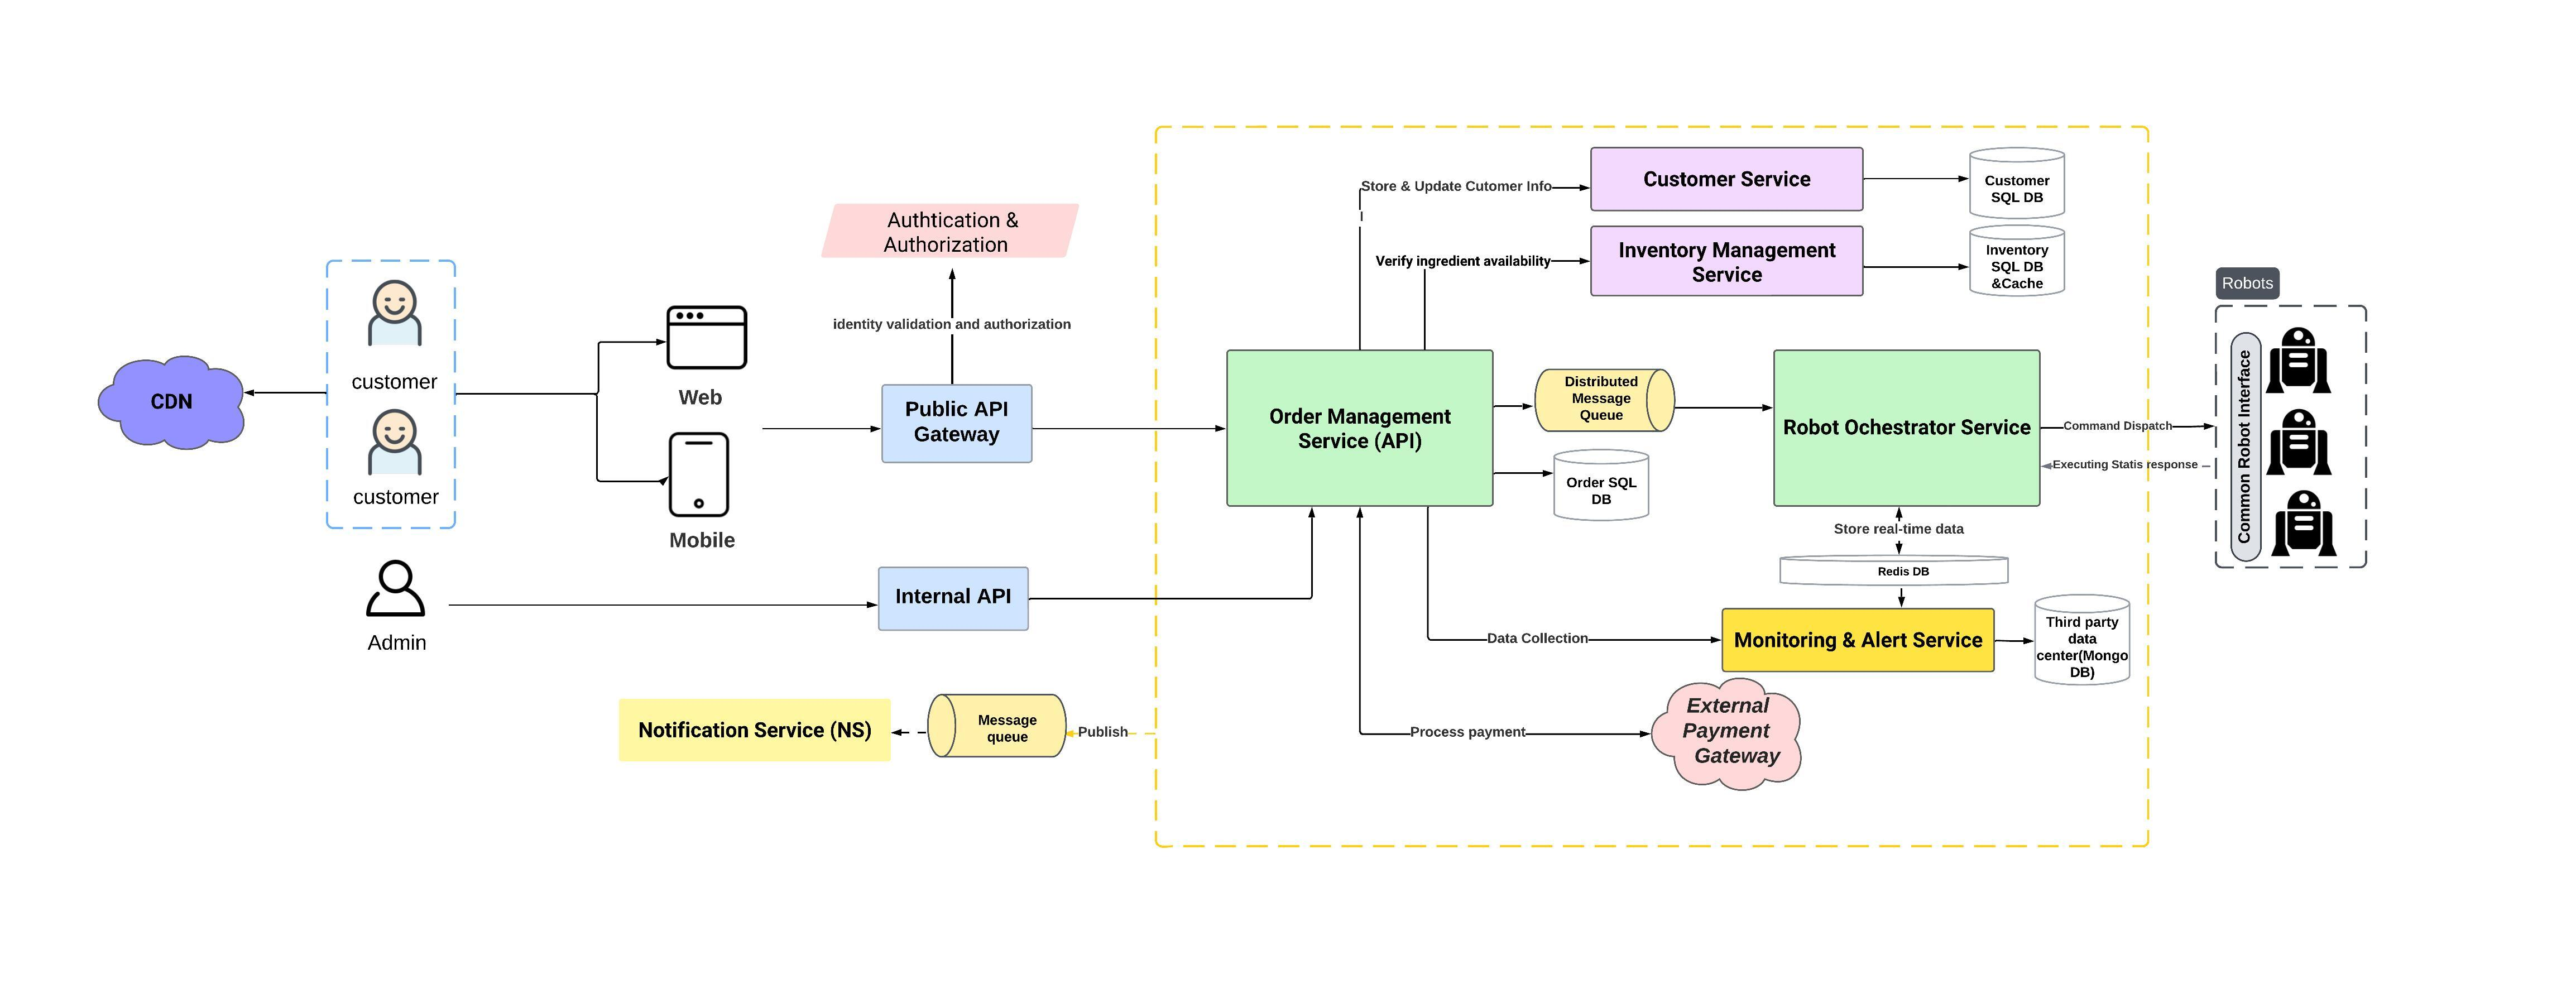

**CDN(content delivery netweok)**: for better load time, CDN is used to cache all static assets, including javascript budles , images, videos, HTML etc.

**Public API Gateway**: this is fully managed service that supports rate limiting , suthentication ,etc. The API gateway is consigured to direct requests to specific servies based on the endpoints. For example, requests to load the restaurant homepage are directed to the order management service and requests to profile are rounted to the Customer Service

**Internal APIs：** those APIs are only available for authorized staff. they are accessible through internal software or websites. they are usually further protected by a VPN



## 3. sequence diagram or flowchart showing the steps from receiving an order to dispensing the completed order.





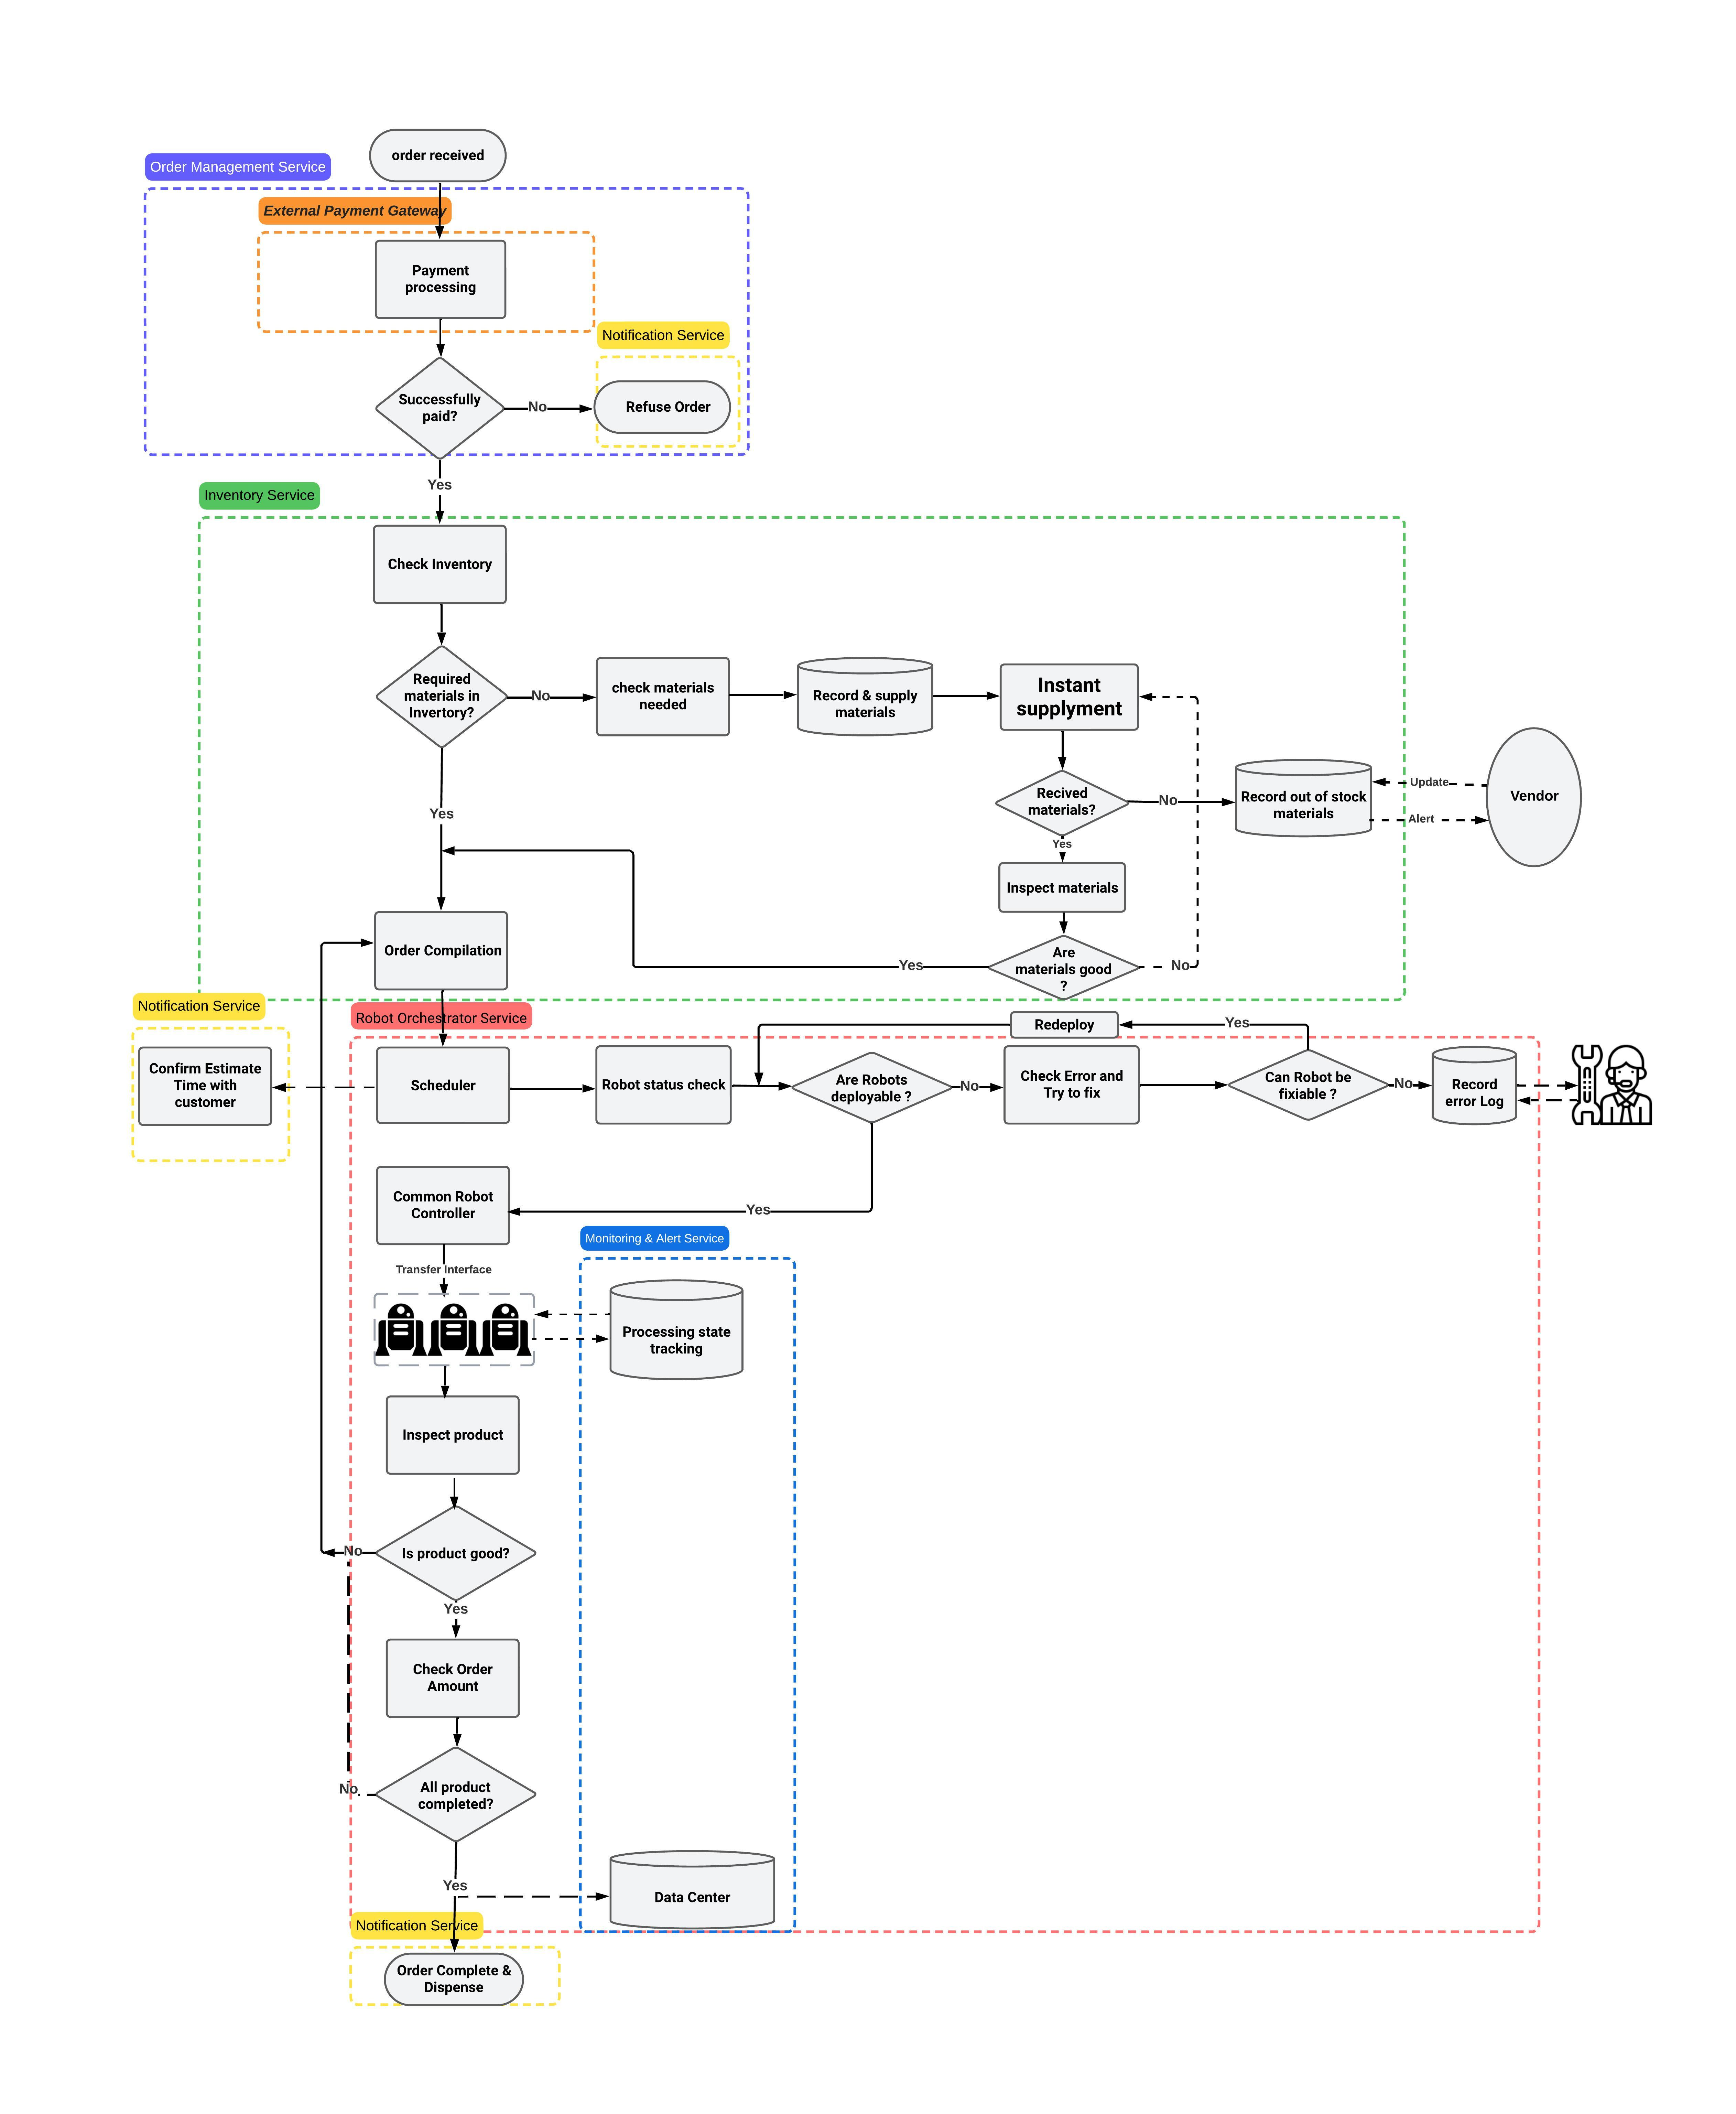

## 4. data structure to store a representation of orders.

**The relationship among Order, Item, Task and Robot are :**
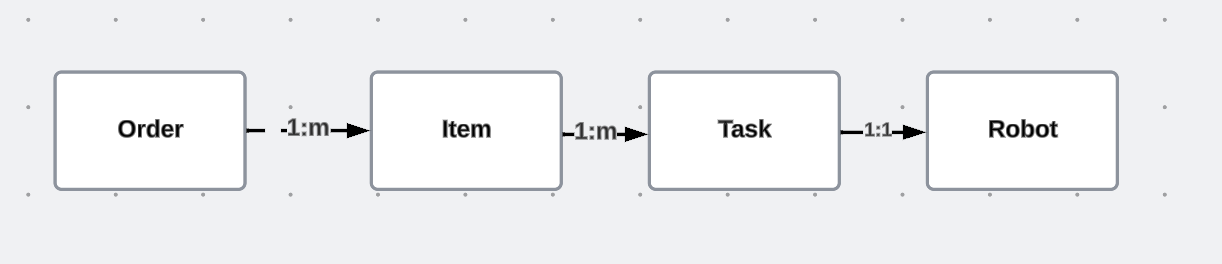


In [ ]:
class OrderStatus(Enum):
    PENDING = "Pending"
    REJECTED = "Rejected"
    COMPLETED = "Completed"
    CANCELED = "Canceled"
    PERPARING = "Preparing"
    REFUNDED = "Refunded"
    UNKNOWN = "Unknown"

class Customer:
    def __init__(self, customerId:str, name: str, phone: str, email: str):
        self.customerId = customerId
        self.name = name
        self.phone = phone
        self.email = email

class Order:
    def __init__(self, orderId: int, customer: Customer, items: List[Item], status: OrderStatus, paymentDetails: PaymentDetails, priority: int=0):
        self.orderId = orderId # int
        self.customer = customer # Customer object
        self.items = items # list of Item objects
        self.status = status # str
        self.paymentDetails = paymentDetails # Payment object
        self.priority = priority # int help to decide order's processing order
        self.timestamp = time.time() # float
class Item:
    def __init__(self, itemId: str, name: str, preparationTasks: List[Task], price: float,quantity):
        self.itemId = itemId
        self.name = name
        self.preparationTasks = preparationTasks  # list: List of Task objects for preparing the food
        self.price = price
        self.quantity = quantity


In [ ]:
class Task:
    def __init__(self, taskId: str, robot: Robot,item: Item, ingredient_quantity: int, ingredientsQtyMap: Dict[str, int],additionalInstruction: str = None):
        self.taskId = taskId  # str: Unique identifier for the task
        self.item = Item  # item related to the task
        self.robot = robot       #pecialized robot handling the task
        self.ingredientsQtyMap= ingredientsQtyMap #dict (ingredient, quantity)
        self.robot_capability = robot_capability
        self.additionalInstruction = additionalInstruction  # str: Special instructions for the task


class CookingTask(Task) :
    def __init__(self, cookingTaskId: str, cookTime: str, quantity: int, instruction: str,robotId: str,temperature:str):
        super().__init__(cookingTaskId, robotId, None, quantity, None, instruction)
        self.cookTime = cookTime # str: cooking time
        self.temperature =  temperature #str: cooking temperature

In [ ]:
class RobotCapability(Enum):
    COOK = "Cook"
    ASSEMBLE = "Assemble"
    PACKAGE = "Package"

class RobotStatus(Enum):
    IDLE = "Idle"
    OCCUPIED = "Occupied"
    MAINTENANCE = "Maintenance"
    DEACTIVATED = "Deactivated"

class Robot:
    def __init__(self, robotId: str, name: str, capability: RobotCapability, status: RobotStatus = RobotStatus.IDLE):
        self.robotId = robotId                     # str: Unique identifier for the robot
        self.name = name                           # str: Name of the robot
        self.capability = capability               # RobotCapability: Capability of the robot (e.g., RobotCapability.COOK) help to validate the TASK
        self.status = status                       # RobotStatus: Current status of the robot (e.g., RobotStatus.IDLE)
        self.currentTask = None                    # Reference to the current Task object being performed
        self.taskHistory = []                      # list[taskId]: List of tasks performed in the past

# Example usage
robot = Robot("R1", "CookBot", RobotCapability.COOK)
item = Item("I1", "Burger", [], 5.99, 1)
task = Task("T1", robot, item, 2, {"beef": 1}, "Medium-rare")


```
payload = {
  "orderId": "12345",
  "customer": {
    "name": "John",
    "phone": "6692845912",
    "email": "john@example.com"  # also can be customerId id only
  },
  "items": [
    {
      "itemId": "Burger01",
      "quantity": 2,
      "addtionalInstructions": "Extra cheese"
    },
    {
      "itemId": "Burger02",
      "quantity": 1,
      "addtionalInstructions": "No cheese"
    }
  ],
  "status": "Preparing",
  "paymentDetails": {
      "method": "credit card",
      "transactionId": "abc123"
  },
  "timestamp": "2023-08-08T10:00:00Z"
}




```



## 5. Design a high-level robot controller that manages the robots. It should receive commands from the restaurant orchestrator service and dispatch commands to robots. Only parts of the API common to all robots need to be designed here.


The design consists of two core service components, OMS and ROS, which interact with the Common Robots Interface (CRI).

1. **OMS - Order Management**:
   - Receives orders from customers.
   - Breaks down the orders into tasks and prioritizes them.
   - Communicates with ROS to schedule and manage tasks.

2. **ROS - Robot Orchestrator Service**:
   - where my robot controlle logic implement
   - Manages the robots in the restaurant.
   - Receives tasks from OMS and schedules them based on priority.
   - Assigns tasks to the robots using the CRI.
   - Monitors and controls robot status.

3. **CRI - Common Robot Interface**:
   - Provides a standard interface for all types of robots.
   - Receives commands from ROS and executes them.
   - Reports status back to ROS.

### Interactions:

- OMS -> ROS: Sends tasks and priorities to ROS for scheduling.
- ROS -> CRI: Sends commands to the robots through CRI and receives status updates.
- CRI -> ROS: Sends status updates and task completion notifications to ROS.
- ROS -> OMS: Optionally sends updates to OMS about task status or completion.

### Graphical Representation:
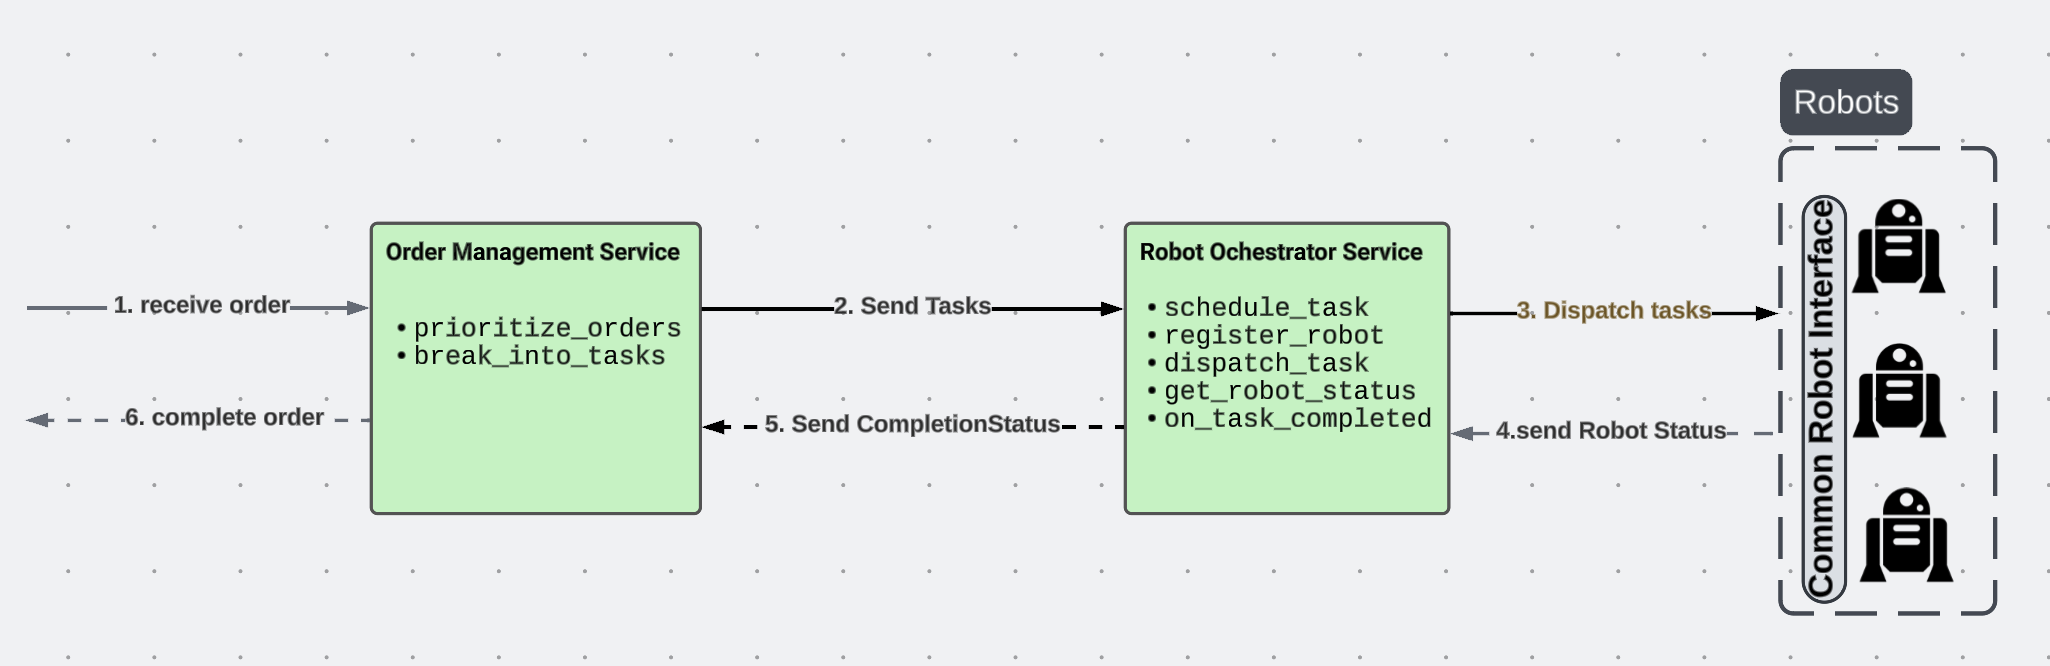




Here are my RPC CALLS defined accordingly.

### Order Management Service (OMS)

#### Data Structures:

- `OrderPayload`: Contains details of the order including customer information, items, and any special instructions.
- `PriorityList`: List of prioritized orders.
- `Task`: Describes an individual task such as cooking or assembling.

#### RPC Calls:

- `receive_order(order_payload: OrderPayload) -> SuccessStatus`:
  - Receives an order and validates it.
  - Queues the order for prioritization.

- `prioritize_orders() -> PriorityList`:
  - Applies rules to prioritize the orders, e.g., based on time, loyalty membership, etc.
  - Can utilize Constraint Programming techniques for optimization.

- `break_into_tasks(order: Order) -> List[Task]`:
  - Breaks down an order into tasks like cooking, assembling, etc.
  - May interact with ROS to check robot availability.

### Robot Orchestrator Service (ROS)

#### Data Structures:

- `CRobot`:All robots will conform to a common interface, defining the methods that they must implement.This ensures that the controller can interact with any robot regardless of its specific functionality.
- `CalculatedPriority`: The calculated priority for tasks.
- `ScheduleStatus`: Status of the scheduling process.
- `DispatchStatus`: Status of the dispatching process.

#### RPC Calls:

- `register_robot(robot: CRobot) -> SuccessStatus`:
  - Registers a new robot to the pool.
  - Validates that the robot has a valid capability.

- `calculate_priority(tasks: List[Task], order_timestamp: datetime, priority: int) -> CalculatedPriority`:
  - Calculates priority based on various factors including time, order priority, etc.
  - Utilizes Constraint Programming techniques for optimization.

- `schedule_task(tasks: List[Task], order_timestamp: datetime, priority: int) -> ScheduleStatus`:
  - Schedules tasks by adding them to a priority queue.
  - Interacts with `RobotPool` to align tasks with robot capabilities.

- `dispatch_task() -> DispatchStatus`:
  - Dispatches the next task from the queue to an available robot with the required capability.
  - Manages scenarios where no matching robot is available.

- `get_robot_status(robot_id: str) -> RobotStatus`:
  - Retrieves the status of a specific robot.
  - Useful for monitoring and logging.

- `set_robot_status(robot_id: str, status: RobotStatus) -> SuccessStatus`:
  - Updates the status of a robot, such as setting it to maintenance mode.
  - Validates the status change.

- `on_task_completed(robot: CRobot) -> CompletionStatus`:
  - Handles the completion of a task.
  - Updates the robot status to IDLE and logs the completion.



Notes :

 The interaction with the common robot interface (CRobot) allows flexibility in handling various robot types and tasks, aligning with the overall design of a robot-controlled restaurant environment. By incorporating principles like Constraint Programming, the system can adapt to complex scheduling requirements and provide an efficient solution for restaurant operations.

Here are the specific data structure:

```
class RobotCapability(Enum):
    COOK = "Cook"
    ASSEMBLE = "Assemble"
    PACKAGE = "Package"

class RobotStatus(Enum):
    ACTIVATED = "Activated". #  Robot which can be useable
    IDLE = "Idle"   # Robot which is in use and waiting to be deployed
    OCCUPIED = "Occupied" # Robot which is working
    MAINTENANCE = "Maintenance" # Robot which is under maintenance
    DEACTIVATED = "Deactivated" # Robot which maybe died or get retired

class CRobot: # Common Robot Interface
    """All robots will conform to a common interface, defining the methods that they must implement. This ensures that the controller can interact with any robot regardless of its specific functionality."""

    @abstractmethod
    def execute_task(self, task: Task) -> bool
    def complete_task(self) -> None
    def get_status(self) -> RobotStatus
    def get_capability(self) -> RobotCapability
    def handle_additional_instruction(self,instruction)->bool
```


## 6. Pick a specific robot. Design a basic API for the robot, so that the high-level restaurant orchestrator service can dispatch robots for tasks and check their status.

### BurgerPattyCookingRobot:
It is a specialized robot designed to handle the cooking of burger patties. it conforms to a common robot interface(CRI).

#### RPC Calls:

1. **`execute_task(task: CookingTask) -> SuccessStatus`**:
   - Executes a given cooking task for the robot, including setting temperature and duration.
   - Validates that the task matches the robot's capability and status.

2. **`complete_task() -> SuccessStatus`**:
   - Marks the current task as complete and sets the robot's status to IDLE.
   - Verifies that the task has been executed successfully.

3. **`get_status() -> RobotStatus`**:
   - Retrieves the current status of the robot.
   - Provides detailed information about the robot's current operation mode.

4. **`get_capability() -> RobotCapability`**:
   - Retrieves the capability of the robot (e.g., burger patty cooking).
   - Ensures that the robot's unique capability is accurately represented.

5. **`handle_additional_instructions(instructions: str) -> SuccessStatus`**:
   - Handles any additional cooking instructions provided.
   - Implements specific additional instructions for burger patty cooking.

6. **`set_temperature(temperature: float) -> SuccessStatus`**: (optional)
   - Sets the cooking temperature for the robot.
   - Validates the temperature range according to predefined settings.

7. **`cook_for_duration(duration: int) -> SuccessStatus`**:(optional)
   - Cooks the patty for the specified duration.
   - Ensures that the cooking duration matches the required parameters for the specific cooking task.



## 7. How would you design the restaurant’s online ordering interface? What framework(s) would you use? Would you design an API and if so what format?


* **Frontend Frameworks**
  - **React**: To craft a dynamic, user-friendly interface for customers to navigate menus and place orders.
  - **Redux or Mobx**: To manage the state of the system, including tracking items in the cart, user details, robot statuses, etc.
  - **Styled-Components or Sass**: To style the application in line with the restaurant's branding.
  - **Mobile App Development**: Utilize React Native or Flutter to create a mobile app, offering the convenience of ordering and tracking robot services on the go.

* **Backend Frameworks**
  - **Spring Boot**: A Java-based framework to facilitate extensive configuration options for complex robotic tasks and orchestration.
  - **Django**: A Python-based framework suitable for handling customer orders, robot scheduling, and integrating with the robotic control system.
  - **Node.js with Express**: Ideal for lightweight, RESTful APIs that enable communication between the interface, robots, and other backend services.

* **API**
  - **REST**: A RESTful API to standardize access to resources like menus, robot statuses, and user profiles, using HTTP methods (GET, POST, PUT, DELETE). Integration with robotic command and control could be achieved using custom endpoints. Documenting the API with OpenAPI specification ensures clarity within the robotic system.
  - **RPC** (alternative)
  - **API Security**: Implementing OAuth2 or JWT (JSON Web Token) to provide secure access to resources, including sensitive robotic control mechanisms.

* **Database**
  - **SQL Database (e.g., PostgreSQL)**: To store order details, user profiles, robot tasks, and more, with schemas designed to support robotic operations.
  - **Redis**: A suitable option for storing real-time robot execution data, enabling quick access to the current status and history of robot activities within the restaurant.





## Analysis Questions:

## 1. What happens if a robot fails?

* **Failure Detection**: Utilize advanced sensors and real-time monitoring tools to detect inconsistencies in robot performance, from minor issues to complete malfunctions. Regular health checks and diagnostics are run to ensure that any failure is quickly identified.
* **Task Redirection**: Implement intelligent task management that can automatically allocate a task to another suitable robot within the system if a failure is detected. If no suitable backup is available, a notification will be sent to the technical support team for immediate manual intervention.
* **Customer Communication**: Implement a communication protocol to inform the customer of any delays or changes in their order due to the robot failure. This may include real-time updates via a mobile app, text messages, or emails.
* **Maintenance Protocols**: Follow maintenance protocols to repair or replace the robot. include troubleshooting guides, repair instructions, and a robust inventory of spare parts. This ensures that the failed robot is either repaired on-site or replaced swiftly.
* **Incident Reporting & Alerting**: Utilize automated reporting tools that log the nature of the failure, the time of occurrence, and the steps taken to resolve it. Alerts are sent to key personnel, including maintenance teams and management, for immediate awareness and action.
* **Recovery & Learning**: Post-recovery, analyze the failure to understand its root cause and apply the learnings to preventive measures. This continuous learning process helps in improving the system's resilience and efficiency.


## 2. How should we go about expanding the throughput of the restaurant?

* **Increase the Robot Amount**: By adding more specialized robots, we can parallelize tasks and reduce the wait time for individual orders. This includes both cooking and serving robots, depending on the bottleneck.
* **Enhance Scheduling Algorithms**: Utilize machine learning and optimization  Constraint Programming techniques to create more intelligent scheduling algorithms. This will ensure that robots are utilized in the most efficient manner, aligning with the order queue, food preparation time, and customer preferences.
* **Rent cloud service**: Rent or build a cloud service that offers scalability. This includes employing scalable databases to handle increased order volumes and utilizing cloud computing to process complex tasks like real-time robot coordination.
* **Pre-prepare Ingredients During Off-Peak Hours**: Analyzing patterns in ordering can help in pre-preparing certain time-consuming ingredients or semi-finished products during non-peak hours. This can significantly cut down on cooking time during rush hours.

## 3. What constraints need to be considered when scheduling order preparation?


1. **Robot Constraints**:
   - **Availability**: Managing occupied, under maintenance, or failed robots.
   - **Capacity**: Limits on the number of tasks each robot can handle.
   - **Specialization**: Each robot is specialized for specific tasks.

2. **Order Constraints**:
   - **Task Dependencies & Timing**: Ensuring tasks are completed in order and within specific timeframes.
   - **Concurrent Orders & Priority Handling**: Balancing multiple orders and handling priority or express orders.
   - **Customization & Special Instructions**: Integrating unique customer requests.

3. **Resource Constraints**:
   - **Ingredient Availability**: Managing ingredient stocks and their preparation statuses.
   - **Storage Space**: Considering space for pre-prepared or completed items.

4. **Quality Constraints**:
   - **Time Sensitivity**: Managing preparation windows to maintain food quality.

5. **Efficiency and Scalability Constraints**:
   - **Energy & Cost Efficiency**: Minimizing operational costs.
   - **Scalability**: Designing for flexibility to handle varying demand.

## 4. What is a naive approach for scheduling order preparation?

  **FIRST COME FIRST SERVE:**  

  ***Processing the orders strictly in the order they are received, without considering factors like robot availability, task complexity, ingredient availability, or potential parallelization of tasks. The system would just assign each task to the corresponding specialized robot, moving to the next task only when the current one is completed.****

  Example:

  Order 1 arrives with three tasks (T1, T2, T3). They are assigned to Robots R1, R2, and R3 respectively.

  Order 2 arrives with three tasks (T4, T5, T6). They must wait for the first order's tasks to be completed.

  R1 completes T1 and moves on to T4.
  R2 completes T2 and moves on to T5.
  R3 completes T3 and moves on to T6.
  Repeat for subsequent orders.


  This is less effective









## 5. How can we find a reasonable scheduling solution in a fixed amount of time?



1. **Analyze System Requirements**:
   - **Understanding Constraints**: Evaluate the constraints and requirements of the system. What is the maximum time allowed for the task to be completed?

2. **Assess Historical Data**:
   - **Previous Execution Times**: If this is a recurring task, you might analyze the historical data to understand how long the task has taken in the past.

3. **Simulate and Test**:
   - **Build Prototypes**: Create simplified or scaled-down versions of the task and measure how long they take to run.
   - **Benchmarking**: Perform benchmarking tests with similar systems or standard datasets to gain insights into potential execution times.

4. **Incorporate Safety Margins**:
   - **Add Buffer Time**: It's often wise to include some buffer time to account for unexpected delays or fluctuations in performance.

5. **Monitor and Adjust**:
   - **Continuous Monitoring**: Regularly monitor the actual execution times and compare them to the fixed time set.

6. **Leveraging AI and Optimization Techniques**:
   - **Heuristic Algorithms**: Utilizing heuristic algorithms such as Simulated Annealing or Genetic Algorithm allows the system to explore various scheduling solutions quickly, arriving at a near-optimal plan in a fraction of the time it might take to find an exact solution. Libraries like SciPy in Python offer implementations for these algorithms.
   - **Demand Prediction with Machine Learning**: Using frameworks like TensorFlow or PyTorch, we can build predictive models to forecast upcoming demand, ensuring better planning of robot resources.

7. **Utilizing Constraint Programming**:
   - **Constraint Satisfaction Computations**: Tools like GOOGLE OR-Tools can be employed to process constraints efficiently, ensuring that the scheduling solution satisfies all necessary conditions and requirements, such as robot capabilities, order deadlines, and resource availability.

8. **Implementing Optimized Data Structures and Parallel Processing**:
   - **Priority Queues or Hash Maps**: By using data structures like Priority Queues or Hash Maps, tasks can be quickly sorted and accessed based on priority or other key attributes, enhancing the efficiency of the scheduling algorithm.
   - **Redis for In-memory Data Storage**: Utilizing Redis can provide fast access to crucial scheduling information, thereby enhancing efficiency.
   - **Parallel Processing**: Distributing the scheduling computations across multiple processors or cores can significantly reduce the time required to find a solution,like the `multiprocessing` module in Python enables distributing the scheduling computations across multiple processors or cores.
   - **Database Connectivity**: SQL databases like PostgreSQL or MySQL could be employed for persistent storage of scheduling data, allowing for robust querying and reporting capabilities.





## 6. How can a customer’s order be prioritized?

Customer orders can be prioritized considers various factors. This ensures a balanced and efficient system for processing orders. Key components include:

1. **Time-Based Priority**:
   - **First-Come, First-Served (FCFS)**: Processing orders in the sequence they are received.

2. **Customer Profile Priority**:
   - **Loyalty Members**: Higher priority for customers in a loyalty program.
   - **Customer Value**: Consideration of past spending or order frequency.

3. **Order Characteristics Priority**:
   - **Special Needs**: Prioritizing dietary restrictions or customized requests.
   - **Complexity**: Prioritizing based on preparation complexity.
   - **Expedited Preparation**: Option for faster preparation for an extra fee.

4. **Operational Factors Priority**:
   - **Predictive Analysis**: Using machine learning to forecast demand and schedule accordingly.
   - **Utilizing Constraint Programming**: Applying constraint satisfaction problems (CSP) and tools like GOOGLE OR-Tools to optimize scheduling and resource allocation based on predefined rules and constraints.


### Implementation Example:

 A customer places an order via the restaurant's app. The system assigns a priority score based on the customer's loyalty level, any urgency noted, the complexity of the order, and the option for expedited preparation if paid extra.

The order is then placed in a queue with other orders, sorted by priority score. The robots prepare the meals in this order, ensuring a balanced approach that takes into account